In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import Input

In [2]:
# Step 2: Load the Boston Housing dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [3]:
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (404, 13)
Test data shape: (102, 13)


In [4]:
# Step 3: Data Normalization
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [5]:
# Step 4: Build the Neural Network model
model = Sequential([
    Input(shape=(x_train.shape[1],)),  # Explicit input layer
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Linear output for regression
])

In [6]:
# Step 5: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [7]:
# Step 6: Train the model
history = model.fit(x_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)

In [8]:
# Step 7: Evaluate the model
test_loss, test_mae = model.evaluate(x_test_scaled, y_test)
print(f"\nTest Mean Absolute Error: {test_mae:.2f}") 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.8443 - mae: 2.8709 

Test Mean Absolute Error: 3.09


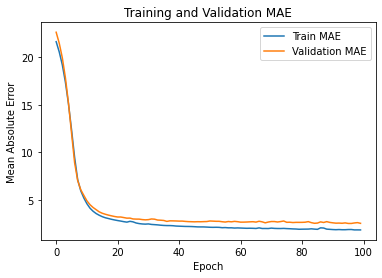

In [9]:
# Step 8: Plot training history
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

In [ ]:
# Step 9: Predict on test data
predictions = model.predict(x_test_scaled)
# predictions

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[ 9.515345 ],
       [17.333948 ],
       [21.304747 ],
       [31.426603 ],
       [25.257189 ],
       [18.977392 ],
       [26.528631 ],
       [20.682394 ],
       [19.956121 ],
       [22.969862 ],
       [19.699837 ],
       [17.174387 ],
       [15.59561  ],
       [41.68376  ],
       [19.256617 ],
       [19.75146  ],
       [25.633831 ],
       [20.617285 ],
       [18.896767 ],
       [36.83763  ],
       [12.090933 ],
       [15.935605 ],
       [20.767397 ],
       [15.676322 ],
       [21.682878 ],
       [25.53559  ],
       [30.531507 ],
       [28.702732 ],
       [11.018049 ],
       [20.983915 ],
       [18.699188 ],
       [15.441259 ],
       [34.166878 ],
       [24.284346 ],
       [18.41638  ],
       [ 9.11472  ],
       [14.869068 ],
       [19.532854 ],
       [19.564909 ],
       [25.03224  ],
       [31.67544  ],
       [28.185625 ],
       [13.878515 ],
       [40.169765 ],
       [30.457798 ],
       [24.682035 ],
       [25.659227 ],
       [16.56

In [17]:
# Step 10: Show some predictions vs actual
for i in range(50):
    print(f"Predicted: {predictions[i][0]:.2f}, Actual: {y_test[i]}")

Predicted: 9.52, Actual: 7.2
Predicted: 17.33, Actual: 18.8
Predicted: 21.30, Actual: 19.0
Predicted: 31.43, Actual: 27.0
Predicted: 25.26, Actual: 22.2
Predicted: 18.98, Actual: 24.5
Predicted: 26.53, Actual: 31.2
Predicted: 20.68, Actual: 22.9
Predicted: 19.96, Actual: 20.5
Predicted: 22.97, Actual: 23.2
Predicted: 19.70, Actual: 18.6
Predicted: 17.17, Actual: 14.5
Predicted: 15.60, Actual: 17.8
Predicted: 41.68, Actual: 50.0
Predicted: 19.26, Actual: 20.8
Predicted: 19.75, Actual: 24.3
Predicted: 25.63, Actual: 24.2
Predicted: 20.62, Actual: 19.8
Predicted: 18.90, Actual: 19.1
Predicted: 36.84, Actual: 22.7
Predicted: 12.09, Actual: 12.0
Predicted: 15.94, Actual: 10.2
Predicted: 20.77, Actual: 20.0
Predicted: 15.68, Actual: 18.5
Predicted: 21.68, Actual: 20.9
Predicted: 25.54, Actual: 23.0
Predicted: 30.53, Actual: 27.5
Predicted: 28.70, Actual: 30.1
Predicted: 11.02, Actual: 9.5
Predicted: 20.98, Actual: 22.0
Predicted: 18.70, Actual: 21.2
Predicted: 15.44, Actual: 14.1
Predicted: 

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,365 (60.02 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,244 (40.02 KB)